In [14]:

#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#importing sklearn packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [15]:
train_data = pd.read_csv(r"C:\Users\Neha Nichani\Desktop\Prerna Data Science\KaggleDataSets\MobilePriceClassifiaction\train.csv")
test_data = pd.read_csv(r"C:\Users\Neha Nichani\Desktop\Prerna Data Science\KaggleDataSets\MobilePriceClassifiaction\test.csv")

In [16]:
train_data.shape, test_data.shape

((2000, 21), (1000, 21))

In [17]:
pd.options.display.max_columns = None


In [42]:
train_data.shape

(2000, 21)

In [43]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [47]:
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Data Analysis

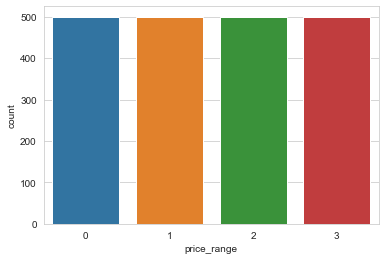

In [44]:
sns.set_style("whitegrid")
sns.countplot(train_data.price_range)

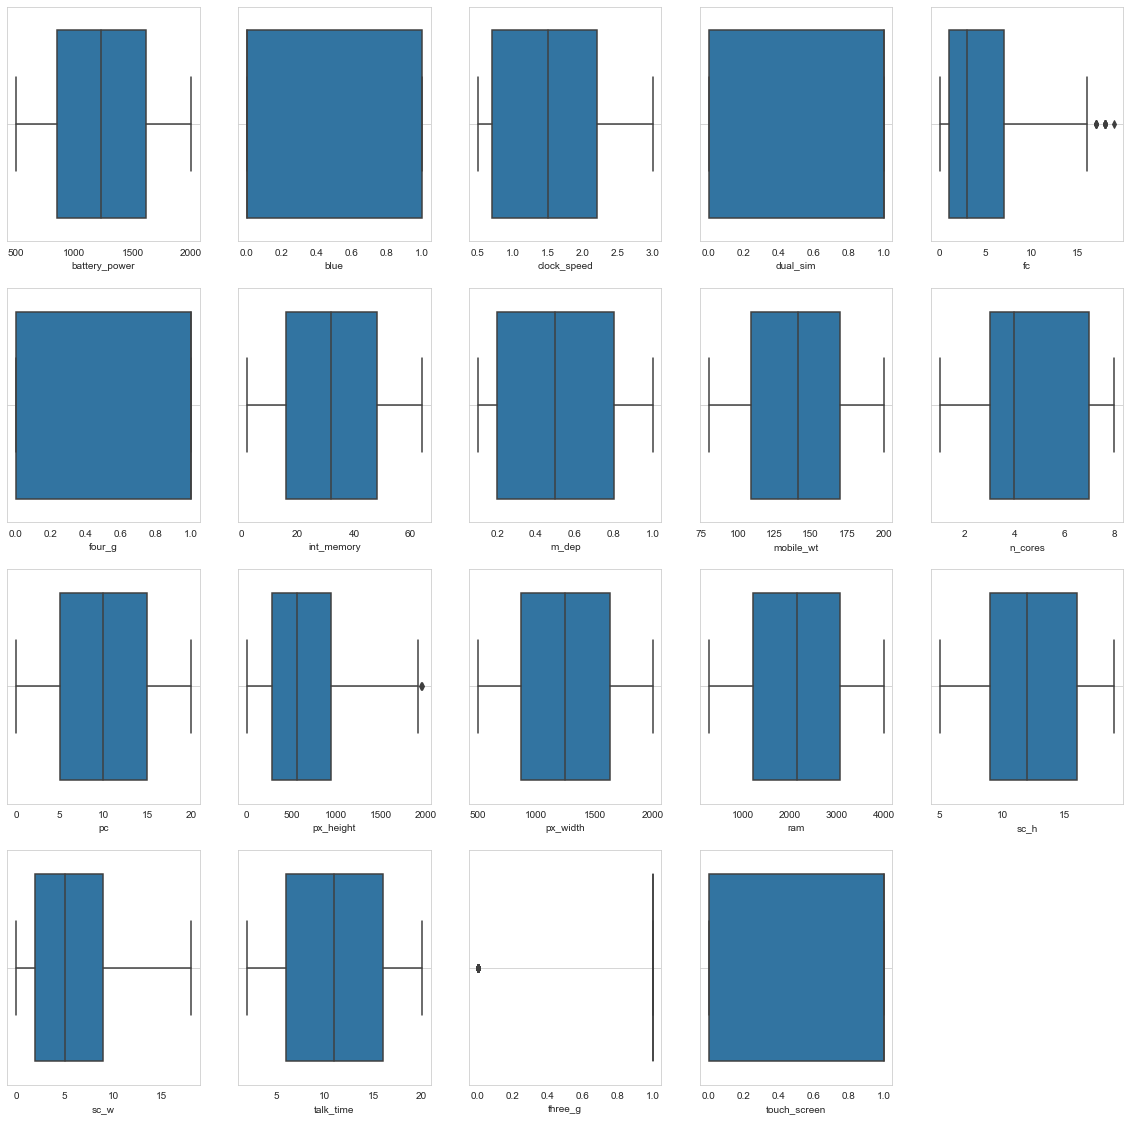

In [45]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(train_data.columns[:-2])):
    plt.subplot(5,5, i+1)
    sns.boxplot(train_data[column])
    plt.grid()

In [50]:
for col in train_data.select_dtypes(include=('int64','float64')).columns:
    print("Number of unique values in {} are {}".format(col, train_data[col].nunique()))

Number of unique values in battery_power are 1094
Number of unique values in blue are 2
Number of unique values in clock_speed are 26
Number of unique values in dual_sim are 2
Number of unique values in fc are 20
Number of unique values in four_g are 2
Number of unique values in int_memory are 63
Number of unique values in m_dep are 10
Number of unique values in mobile_wt are 121
Number of unique values in n_cores are 8
Number of unique values in pc are 21
Number of unique values in px_height are 1137
Number of unique values in px_width are 1109
Number of unique values in ram are 1562
Number of unique values in sc_h are 15
Number of unique values in sc_w are 19
Number of unique values in talk_time are 19
Number of unique values in three_g are 2
Number of unique values in touch_screen are 2
Number of unique values in wifi are 2
Number of unique values in price_range are 4


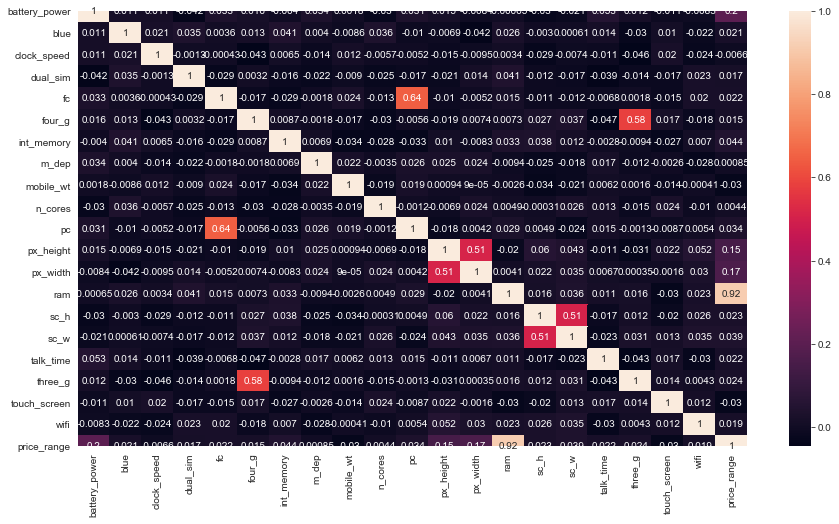

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

In [54]:
#Choosing between fc and pc
#Printing correlation
print(round(train_data[["fc","price_range",]].corr(),2),end="\n\n")
print(round(train_data[["pc","price_range",]].corr(),2))


#we can remove fc as it has low correlation

               fc  price_range
fc           1.00         0.02
price_range  0.02         1.00

               pc  price_range
pc           1.00         0.03
price_range  0.03         1.00


In [55]:
#Choosing between four_g and three_g
#Printing correlation
print(round(train_data[["three_g","price_range",]].corr(),2),end="\n\n")
print(round(train_data[["four_g","price_range",]].corr(),2))


#we can remove four_fg  as it has low correlation

             three_g  price_range
three_g         1.00         0.02
price_range     0.02         1.00

             four_g  price_range
four_g         1.00         0.01
price_range    0.01         1.00


In [56]:
train_data.drop(['four_g','fc'],axis=1,inplace=True)

In [57]:

X = train_data.drop(columns=["price_range"],axis=1)
y = train_data["price_range"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1600, 18), (400, 18), (1600,), (400,))

In [59]:
#Getting numerical features
numeric_features = list(X_train.columns[:-1])
#Getting categorical features
cat_features = list(X_train.columns[-1:])
print("Numerical Features : {}".format(numeric_features),end="\n\n")
print("Categorical Features : {}".format(cat_features))

Numerical Features : ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen']

Categorical Features : ['wifi']


In [60]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return LabelEncoder().fit_transform(X).reshape(-1,1);

In [61]:
#Defining ColumnTransformer
columnTransformer = ColumnTransformer([('scaler', StandardScaler(), numeric_features),
                                       ('encode', OneHotEncoder(), cat_features)], 
                                      remainder='passthrough')

In [62]:

pd.DataFrame(columnTransformer.fit_transform(X_train),columns=X_train.columns).head()

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1.414492,1.017656,-0.743503,-1.006270,1.241791,0.004787,0.213383,1.073347,-0.325030,2.377161,1.451353,-1.409619,-1.257285,-0.173871,-1.306622,0.5475,-0.996257,0.0
1,-1.105370,1.017656,1.581377,-1.006270,1.021236,-0.691531,1.281442,-0.233952,0.333675,-0.746867,-0.617905,0.564223,-0.544521,-1.096572,0.887077,0.5475,-0.996257,1.0
2,-0.519832,-0.982650,-1.232951,0.993769,0.359573,-1.387850,0.578772,-0.233952,-0.654382,0.533917,-0.139666,0.627149,-1.019697,-1.327247,-0.209772,0.5475,1.003757,0.0
3,-1.406113,1.017656,-0.865865,-1.006270,-0.357229,-0.691531,1.590616,1.073347,0.333675,-0.365117,-0.039353,-0.328772,-0.544521,-1.096572,0.887077,0.5475,-0.996257,0.0
4,0.557830,-0.982650,1.581377,-1.006270,0.635266,-1.387850,-0.067685,-0.233952,0.663027,-0.688136,-1.121806,1.061153,0.405830,1.440854,-0.575389,0.5475,1.003757,0.0


In [101]:
#Applying different classifier algorithmns
classifiers = [
    LogisticRegression(multi_class='multinomial'),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ]

#Iterator 
for i,classifier in enumerate(classifiers):
    
    print("Initializing Pipeline",end="\n\n")
    #Defining Pipeline
    pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', classifier)],verbose=True)
    pipe.fit(X_train, y_train)
    print("\n")
    #Printing current classifier
    print("{}.{}".format(i+1, classifier),end="\n\n")
    #Printing score
    print("model score: %.3f" % pipe.score(X_test, y_test),end="\n")
    if(i==4):
        break
    print("-----------------------------------------------------------------------",end="\n\n")

Initializing Pipeline

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


1.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

model score: 0.953
-----------------------------------------------------------------------

Initializing Pipeline

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


2.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

model score: 0.510
-----------------------------

In [102]:
pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier',LogisticRegression())],verbose=True)
pipe.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['battery_power', 'blue',
                                                   'clock_speed', 'dual_sim',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', '...
        

In [103]:
pipe.score(X_test,y_test)

0.9525

In [104]:
prediction=pipe.predict(test_data)

In [105]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [106]:
#Adding the predicting values to test_data
test_data.loc[:,'price_range'] = prediction

In [107]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
